In [2]:
# The code was removed by Watson Studio for sharing.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [30]:
df['floors'].value_counts()


1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [26]:
df.drop(['id'], axis = 1,inplace=True )
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


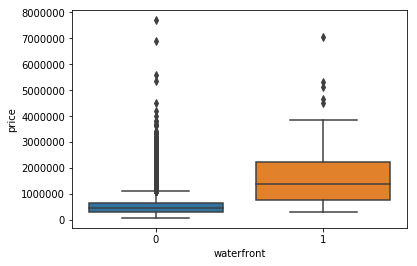

In [34]:
import seaborn as sns
ax = sns.boxplot(x=df['waterfront'], y=df['price'], data=df)

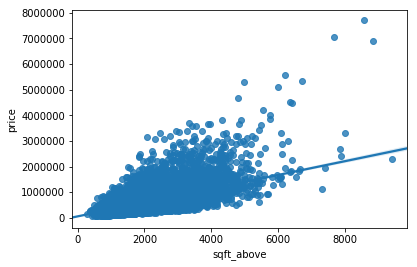

In [36]:
ax = sns.regplot(x=df['sqft_above'], y=df['price'], data=df)

In [45]:
from sklearn import linear_model
import numpy as np
from sklearn.metrics import r2_score
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['sqft_living']])
train_y = np.asanyarray(train[['price']])
regr.fit (train_x, train_y)
test_x = np.asanyarray(test[['sqft_living']])
test_y = np.asanyarray(test[['price']])
test_y_hat = regr.predict(test_x)
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )


R2-score: -0.07


In [49]:

from sklearn import linear_model
import numpy as np
from sklearn.metrics import r2_score
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
train_y = np.asanyarray(train[['price']])
regr.fit (train_x, train_y)
test_x = np.asanyarray(test[['floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
test_y = np.asanyarray(test[['price']])
test_y_hat = regr.predict(test_x)
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )


R2-score: 0.50


In [58]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import r2_score
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
train_x = np.asanyarray(train[['floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
train_y = np.asanyarray(train[['price']])

poly = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(train_x)
clf = linear_model.LinearRegression()
train_y_ = clf.fit(x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

XX = np.arange(-4.5, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Coefficients:  [[ 8.91835004e+00 -1.15315107e+06 -3.12919363e+07  1.90467068e+08
  -1.07129016e+06 -8.25630151e+03 -2.15887911e+06  1.21599708e+06
  -1.03486384e+03  2.55003756e+03 -6.73777597e+06 -5.70604909e+03
   2.35830283e+04 -1.03502386e+05  2.40972688e+04  3.38958815e+04
   6.40123488e+01  8.73463128e+03 -7.19571565e+04 -4.74698402e+01
  -3.77768574e+01  7.96163495e+03  2.62869970e+01 -3.12919506e+07
   1.32904551e+06 -1.65413331e+04  2.85930940e+01 -7.21816776e+04
   3.67463069e+04  9.65031140e+01  1.60318402e+02 -9.93367944e+04
   1.88904786e+02 -2.01135022e+06  2.12284082e+04  1.70930323e+02
   4.39303740e+04 -2.51218917e+04  2.62131682e+01 -5.48503684e+01
   1.42144815e+05  1.16157212e+02  4.47015252e+03 -6.35681966e+00
   1.16026069e+03 -1.78836637e+04  9.90796411e+00 -2.83484492e+00
   3.50115217e+03 -9.14812861e+00  4.55661793e+00 -1.27023019e+01
  -2.50008587e+01  1.19129978e+01 -7.42086743e+00  2.11312706e+01
  -5.15623342e+00  1.55300329e+03  1.20481876e+04  2.46400082

In [4]:
from sklearn import linear_model
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
train_x = np.asanyarray(train[['floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
train_y = np.asanyarray(train[['price']])
rr = Ridge(alpha=0.01)
rr.fit(train_x, train_y)
test_x = np.asanyarray(test[['floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
test_y = np.asanyarray(test[['price']])

test_y_ = rr.predict(test_x)
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )


R2-score: 0.55


In [ ]:
from sklearn import linear_model
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
train_x = np.asanyarray(train[['floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
train_y = np.asanyarray(train[['price']])
poly = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(train_x)
clf = linear_model.LinearRegression()
train_y_ = clf.fit(x_poly, train_y
XX = np.arange(-4, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
test_x_poly = poly.fit_transform(test_x)
rr = Ridge(alpha=0.01)
rr.fit(test_x_poly, train_y)
test_x = np.asanyarray(test[['floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
test_y = np.asanyarray(test[['price']])

test_y_ = rr.predict(test_x)
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )